In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.10,fbeta_0.12,fbeta_0.14,fbeta_0.16,fbeta_0.18,fbeta_0.20,...,fbeta_0.82,fbeta_0.84,fbeta_0.86,fbeta_0.88,fbeta_0.90,fbeta_0.92,fbeta_0.94,fbeta_0.96,fbeta_0.98,accuracy
0,1,3.000000e-07,1.454320,0.737176,0.183394,0.188914,0.193890,0.196821,0.199024,0.200843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.620398
1,2,3.270000e-06,1.376712,0.711047,0.208559,0.209686,0.211049,0.212152,0.213365,0.214702,...,0.035990,0.007700,0.000648,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.592922
2,3,6.240000e-06,1.323228,0.667067,0.213416,0.214453,0.215560,0.216784,0.217664,0.218812,...,0.005252,0.000197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.619174
3,4,9.210000e-06,1.311713,0.677708,0.213224,0.214081,0.214840,0.215652,0.216363,0.217201,...,0.357647,0.330799,0.279692,0.201581,0.105345,0.031793,0.004881,0.000037,0.000000,0.608219
4,5,1.218000e-05,1.273441,0.677146,0.214707,0.215693,0.216662,0.217839,0.218717,0.219514,...,0.369823,0.370273,0.354738,0.317934,0.254542,0.148250,0.038805,0.000183,0.000000,0.635212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,3.000000e-05,0.460468,0.280751,0.426600,0.439042,0.449800,0.459299,0.468131,0.476677,...,0.700476,0.709430,0.719271,0.729256,0.740243,0.752670,0.765911,0.780008,0.770115,0.911400
118,119,3.000000e-05,0.445155,0.290717,0.374408,0.384846,0.393842,0.402232,0.410335,0.417971,...,0.687399,0.701808,0.717419,0.733400,0.750651,0.766062,0.780390,0.789931,0.758699,0.888609
119,120,3.000000e-05,0.446681,0.264861,0.402821,0.416080,0.427934,0.439070,0.449634,0.459826,...,0.756533,0.764243,0.770571,0.774849,0.779237,0.780333,0.771956,0.747366,0.657138,0.915842
120,121,3.000000e-05,0.458923,0.275841,0.391118,0.404008,0.415767,0.426656,0.436680,0.446027,...,0.712755,0.724845,0.736951,0.748530,0.759795,0.768961,0.776533,0.776148,0.732495,0.904778


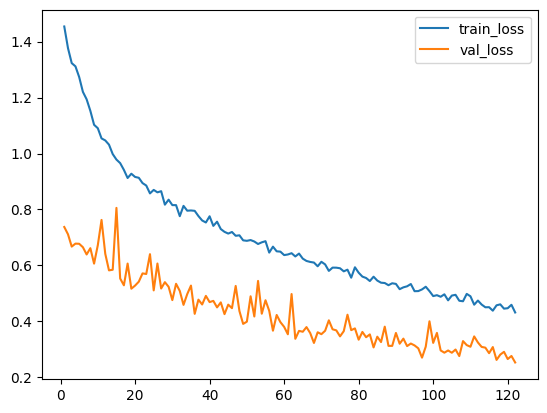

In [2]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.3, 0.8)

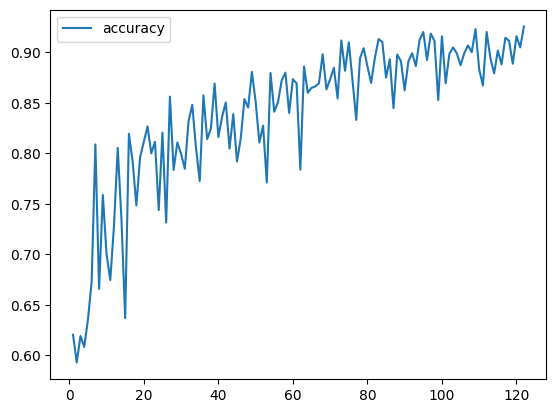

In [3]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

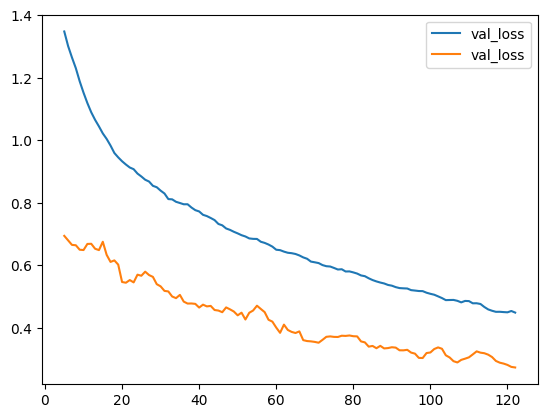

In [4]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(122, 45)
0.79140704870224


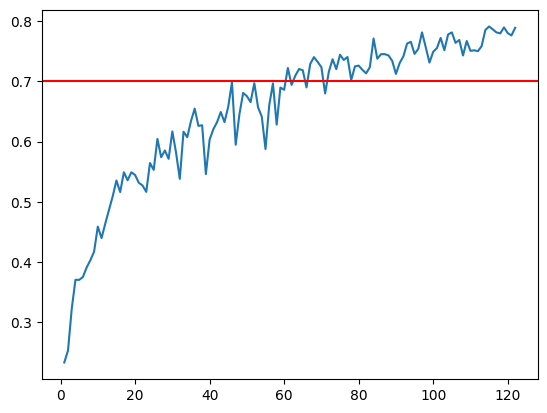

In [12]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

print(np.max(df_fbeta))

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')

# plt.ylim(0.75, 0.82)

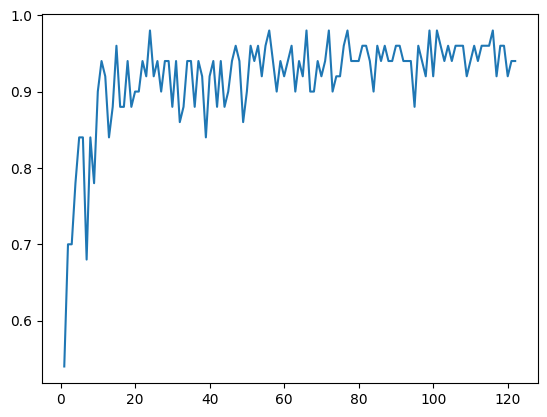

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta = 0.1 + 0.02 * df_fbeta

df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

In [7]:
# get rows where epoch = 50, 60, 70, 80, 90, 100
df_subset = df[df["epoch"].isin([50, 60, 70, 80, 90, 100, 110, 120])]
df_subset

,epoch,lr,loss_train,loss_val,fbeta_0.10,fbeta_0.12,fbeta_0.14,fbeta_0.16,fbeta_0.18,fbeta_0.20,...,fbeta_0.82,fbeta_0.84,fbeta_0.86,fbeta_0.88,fbeta_0.90,fbeta_0.92,fbeta_0.94,fbeta_0.96,fbeta_0.98,accuracy
49,50,0.00003,0.687717,0.398490,0.301628,0.312550,0.322045,0.330509,0.337958,0.344698,...,0.625766,0.644297,0.660629,0.672248,0.675675,0.658534,0.606187,0.493564,0.253060,0.851435
59,60,0.00003,0.636670,0.380026,0.339382,0.351580,0.362142,0.371564,0.380209,0.388262,...,0.625424,0.639579,0.653777,0.668040,0.679194,0.686202,0.680190,0.637323,0.496039,0.873324
69,70,0.00003,0.612670,0.353851,0.323514,0.332753,0.341131,0.349062,0.356657,0.363985,...,0.665954,0.678103,0.691096,0.704551,0.715681,0.723725,0.722483,0.699178,0.592424,0.873133
79,80,0.00003,0.573679,0.334091,0.349958,0.361567,0.371527,0.380310,0.388840,0.396945,...,0.672595,0.684222,0.696098,0.708209,0.717755,0.725458,0.726379,0.706129,0.616723,0.885939
89,90,0.00003,0.533637,0.358173,0.335140,0.344027,0.352024,0.359247,0.365838,0.372324,...,0.606918,0.620287,0.635805,0.653596,0.674281,0.693797,0.709914,0.712516,0.665625,0.862349
99,100,0.00003,0.490050,0.322641,0.445185,0.458003,0.469151,0.479310,0.488480,0.496882,...,0.716593,0.724620,0.731980,0.738795,0.745241,0.749279,0.746846,0.731295,0.640780,0.915733
109,110,0.00003,0.489296,0.308828,0.364027,0.374343,0.383558,0.391744,0.399439,0.406984,...,0.677079,0.692118,0.707048,0.720720,0.732614,0.743426,0.750899,0.735233,0.642245,0.882866
119,120,0.00003,0.446681,0.264861,0.402821,0.416080,0.427934,0.439070,0.449634,0.459826,...,0.756533,0.764243,0.770571,0.774849,0.779237,0.780333,0.771956,0.747366,0.657138,0.915842


In [8]:
df_subset

,epoch,lr,loss_train,loss_val,fbeta_0.10,fbeta_0.12,fbeta_0.14,fbeta_0.16,fbeta_0.18,fbeta_0.20,...,fbeta_0.82,fbeta_0.84,fbeta_0.86,fbeta_0.88,fbeta_0.90,fbeta_0.92,fbeta_0.94,fbeta_0.96,fbeta_0.98,accuracy
49,50,0.00003,0.687717,0.398490,0.301628,0.312550,0.322045,0.330509,0.337958,0.344698,...,0.625766,0.644297,0.660629,0.672248,0.675675,0.658534,0.606187,0.493564,0.253060,0.851435
59,60,0.00003,0.636670,0.380026,0.339382,0.351580,0.362142,0.371564,0.380209,0.388262,...,0.625424,0.639579,0.653777,0.668040,0.679194,0.686202,0.680190,0.637323,0.496039,0.873324
69,70,0.00003,0.612670,0.353851,0.323514,0.332753,0.341131,0.349062,0.356657,0.363985,...,0.665954,0.678103,0.691096,0.704551,0.715681,0.723725,0.722483,0.699178,0.592424,0.873133
79,80,0.00003,0.573679,0.334091,0.349958,0.361567,0.371527,0.380310,0.388840,0.396945,...,0.672595,0.684222,0.696098,0.708209,0.717755,0.725458,0.726379,0.706129,0.616723,0.885939
89,90,0.00003,0.533637,0.358173,0.335140,0.344027,0.352024,0.359247,0.365838,0.372324,...,0.606918,0.620287,0.635805,0.653596,0.674281,0.693797,0.709914,0.712516,0.665625,0.862349
99,100,0.00003,0.490050,0.322641,0.445185,0.458003,0.469151,0.479310,0.488480,0.496882,...,0.716593,0.724620,0.731980,0.738795,0.745241,0.749279,0.746846,0.731295,0.640780,0.915733
109,110,0.00003,0.489296,0.308828,0.364027,0.374343,0.383558,0.391744,0.399439,0.406984,...,0.677079,0.692118,0.707048,0.720720,0.732614,0.743426,0.750899,0.735233,0.642245,0.882866
119,120,0.00003,0.446681,0.264861,0.402821,0.416080,0.427934,0.439070,0.449634,0.459826,...,0.756533,0.764243,0.770571,0.774849,0.779237,0.780333,0.771956,0.747366,0.657138,0.915842


In [9]:
df_fbeta = df_subset.filter(regex=("fbeta_.*"))
# find columns with max value in each row
df_fbeta_argmax = np.argmax(df_fbeta.values, axis=1)
df_fbeta_argmax


array([40, 41, 41, 42, 43, 41, 42, 41])

In [10]:
# get column at index 40
df_fbeta.iloc[:, 41]

49     0.658534
59     0.686202
69     0.723725
79     0.725458
89     0.693797
99     0.749279
109    0.743426
119    0.780333
Name: fbeta_0.92, dtype: float64

In [14]:
import zarr

z = zarr.open("/home/viktor/Documents/kaggle/vesuvius-challenge/kaggle-data/train-1.zarr", mode="r")

In [31]:
np.array(z.surface_volume).min(), np.array(z.surface_volume).max()

(0, 65535)

In [24]:
np.array(z['mask']).min()

0